# Assignment 1

The assignment consists in the prediction of default payments using a neural network. 

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

The provided data comprises the training set that can be used for the training (and eventually for the validation) and the unlabelled test set.



In order to be evaluated, each student should submit a zip file named Nome_Cognome_Matricola_assignment1.zip containing all and only:

- the source code;
- a brief PDF or WORD report (1 or 2 pages) with some motivations about the choices on the data processing, the number and dimension of the layers, the activation functions and the loss functions, and some comments about the results.
- (optional) a txt file named Nome_Cognome_Matricola_score1.txt, where each line corresponds to the prediction (0/1 class) of the instances of the test set. The file should contain only one 0/1 column and with no header.


Collaboration is allowed, but the final product must be individual.

After the deadline, the name of the students with the highest classification performance (in terms of weighted F-measure) evaluated on the submitted results will be announced. Only well-formatted submissions will be considered.



For any problem contact debora.nozza@unimib.it.

## Dataset introduction

This notebook was created to learn basic techniques of data manipulation and machine learning. The idea is to use the dataset UCI_Credit_Card to improve basic skills of data cleaning, data analysis, data visualization and machine learning. It is primarily intended to help myself understanding what to do and how. Any feedback is welcome.

Variables
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## Packages needed for analysis

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

/Users/raffaeleanselmo/anaconda3/envs/AML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/raffaeleanselmo/anaconda3/envs/AML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/raffaeleanselmo/anaconda3/envs/AML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/raffaeleanselmo/an

## Read the data

In [2]:
train = pd.read_csv('train.csv')

train.sample(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
12701,200000.0,1,1,2,60,-1,-1,-1,-1,-1,...,12474.0,17785.0,12500.0,12453.0,21957.0,12474.0,17811.0,12500.0,0.0,0
4264,260000.0,2,1,1,48,0,0,0,-2,-2,...,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
test = pd.read_csv('test-3.csv')

test.sample(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1579,210000.0,2,1,1,54,-1,-1,-1,-1,-1,...,11755.0,5808.0,3974.0,0.0,6555.0,11800.0,5818.0,4015.0,0.0,0.0
2260,100000.0,2,1,2,32,0,-1,0,0,0,...,104346.0,91025.0,91120.0,1777.0,6157.0,100000.0,2017.0,1822.0,1777.0,7748.0


In [4]:
df = train.append(test)

/Users/raffaeleanselmo/anaconda3/envs/AML/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [5]:
df.sample(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default.payment.next.month
13991,43,172.0,1930.0,1752.0,3710.0,3848.0,4285.0,2,290000.0,1,...,0,0,1930.0,0.0,2000.0,200.0,500.0,0.0,1,0.0
2723,27,543.0,2070.0,370.0,-20.0,780.0,0.0,6,20000.0,2,...,-1,-1,1100.0,5193.0,0.0,800.0,0.0,0.0,1,NaN
137,51,60557.0,58563.0,27436.0,29752.0,30351.0,28871.0,2,60000.0,1,...,0,0,3040.0,3000.0,3000.0,4000.0,2000.0,3000.0,1,NaN
3325,29,24802.0,27551.0,20559.0,17228.0,6531.0,8411.0,1,90000.0,2,...,0,0,3200.0,0.0,1000.0,1000.0,2000.0,0.0,1,0.0
24278,37,41030.0,40120.0,51591.0,67772.0,71846.0,68876.0,2,210000.0,1,...,0,0,3012.0,15065.0,30002.0,5023.0,2149.0,3041.0,1,0.0


## Check missing data

In [1]:
train.info()

NameError: name 'traini' is not defined

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
LIMIT_BAL    3000 non-null float64
SEX          3000 non-null int64
EDUCATION    3000 non-null int64
MARRIAGE     3000 non-null int64
AGE          3000 non-null int64
PAY_0        3000 non-null int64
PAY_2        3000 non-null int64
PAY_3        3000 non-null int64
PAY_4        3000 non-null int64
PAY_5        3000 non-null int64
PAY_6        3000 non-null int64
BILL_AMT1    3000 non-null float64
BILL_AMT2    3000 non-null float64
BILL_AMT3    3000 non-null float64
BILL_AMT4    3000 non-null float64
BILL_AMT5    3000 non-null float64
BILL_AMT6    3000 non-null float64
PAY_AMT1     3000 non-null float64
PAY_AMT2     3000 non-null float64
PAY_AMT3     3000 non-null float64
PAY_AMT4     3000 non-null float64
PAY_AMT5     3000 non-null float64
PAY_AMT6     3000 non-null float64
dtypes: float64(13), int64(10)
memory usage: 539.2 KB


## Dataset Overview

In [8]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


Da un'analisi preliminare delle variabili non si evidenziano valori mancanti. Tuttavia le variabili categoriche "Education" e "Marriage" assumono alcuni valori non documentati nelle informazioni disponibili sul dataset.

In [9]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Anche in questo caso si evidenzia la presenza di un valore non documentato (-2) per tutte le variabili relative allo stato dei pagamenti precedenti "PAY_X".

In [10]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [11]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In questo caso si evidenziano i valori di minimo che assumono valori negativi, questi potrebbero tuttavia riferirsi in maniera plausibile al contesto a situazioni di credito.

In [12]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Data exploration

In [13]:
import seaborn as sns

## Check for unbalanced class

Considerando che il nostro task principale è quello di sviluppare un modello predittivo verifichiamo la distribuzione delle classi della variabile target "default payment next month"

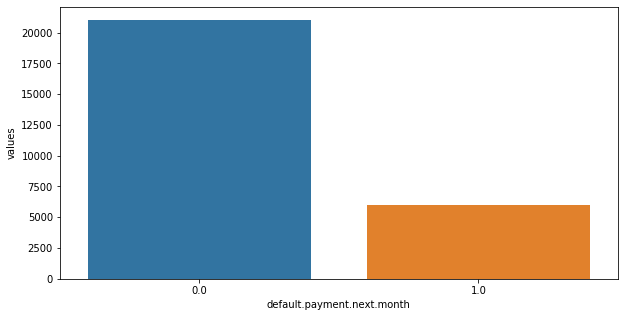

In [14]:
train = df[:27000]
default = train["default.payment.next.month"].value_counts()
data = pd.DataFrame({'default.payment.next.month': default.index,
                   'values': default.values})
plt.figure(figsize = (10,5))
sns.barplot(x = 'default.payment.next.month', y="values", data=data)
plt.show()

In [15]:
neg, pos = np.bincount(train["default.payment.next.month"])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 27000
    Positive: 5973 (22.12% of total)



L'analisi della variabile target ha evidenziato che **5973** clienti su **21027** risultano inadempienti (22.12%) potrebbero pertanto rivelarsi necessarie alcune operazioni preliminari sulla variabile target.

## Exploring variables relation and correlation

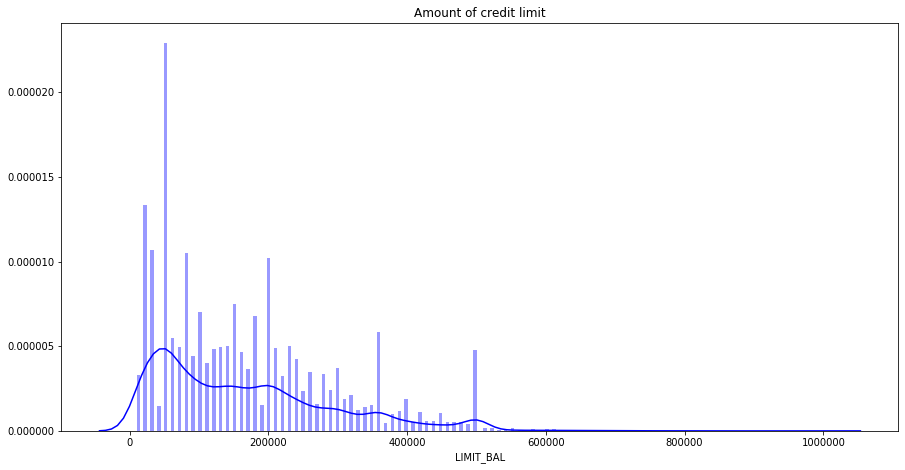

In [16]:
plt.figure(figsize = (15,7.5))
plt.title('Amount of credit limit')
sns.distplot(train['LIMIT_BAL'],kde=True, bins=200, color="blue")
plt.show()

In [17]:
train['LIMIT_BAL'].value_counts()

50000.0      3064
20000.0      1781
30000.0      1431
80000.0      1407
200000.0     1367
             ... 
730000.0        1
1000000.0       1
690000.0        1
740000.0        1
760000.0        1
Name: LIMIT_BAL, Length: 80, dtype: int64

#### Credit limit vs. Age

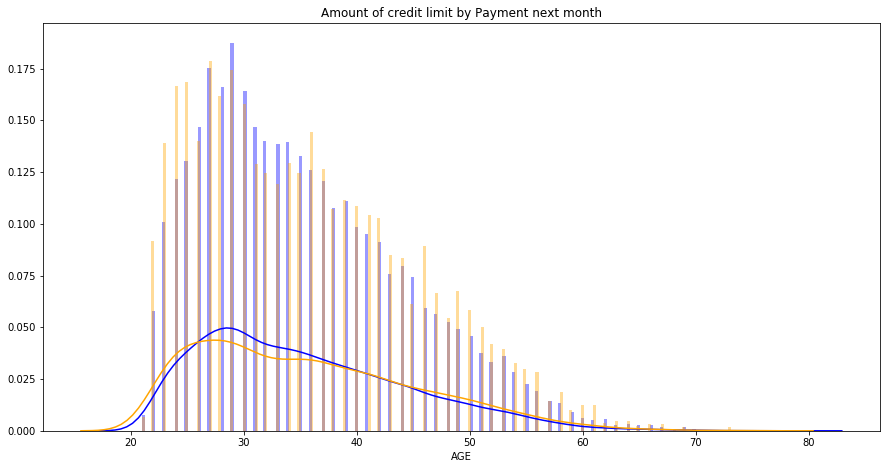

In [18]:
classe0 = train[train['default.payment.next.month']==0]['AGE']
classe1 = train[train['default.payment.next.month']==1]['AGE']

plt.figure(figsize = (15,7.5))
plt.title('Amount of credit limit by Payment next month')
sns.distplot(classe0,kde=True, bins=200, color="blue")
sns.distplot(classe1,kde=True, bins=200, color="orange")
plt.show()

#### Credit limit vs. Target variable

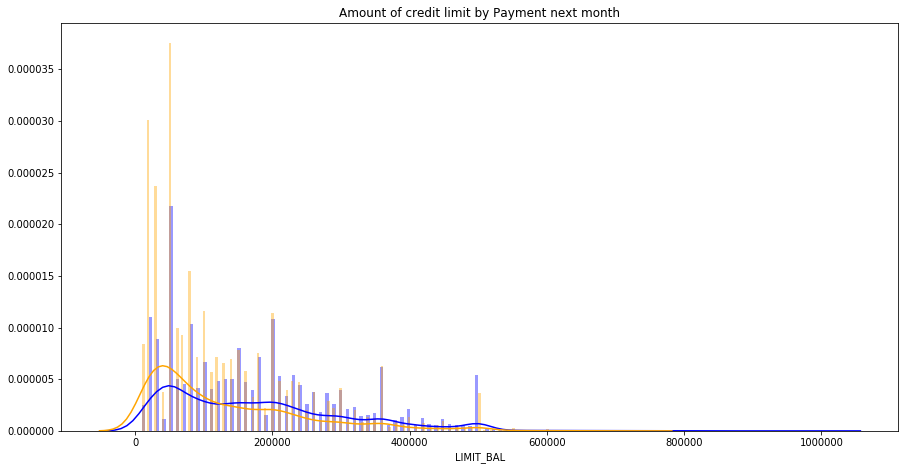

In [19]:
classe0 = train[train['default.payment.next.month']==0]['LIMIT_BAL']
classe1 = train[train['default.payment.next.month']==1]['LIMIT_BAL']

plt.figure(figsize = (15,7.5))
plt.title('Amount of credit limit by Payment next month')
sns.distplot(classe0,kde=True, bins=200, color="blue")
sns.distplot(classe1,kde=True, bins=200, color="orange")
plt.show()

#### Credit limit vs. Sex

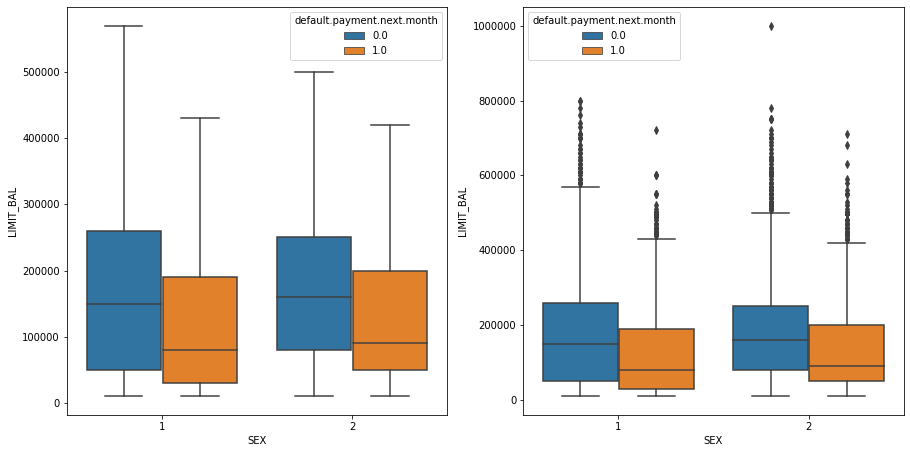

In [20]:
fig,(AX1, AX2)  = plt.subplots(ncols=2, figsize=(15,7.5))
s = sns.boxplot(ax = AX1, x="SEX", y="LIMIT_BAL",hue="default.payment.next.month", data=train,showfliers=False)
s = sns.boxplot(ax = AX2, x="SEX", y="LIMIT_BAL",hue="default.payment.next.month", data=train,showfliers=True)
plt.show()

#### Credit limit vs. Target variable and Sex

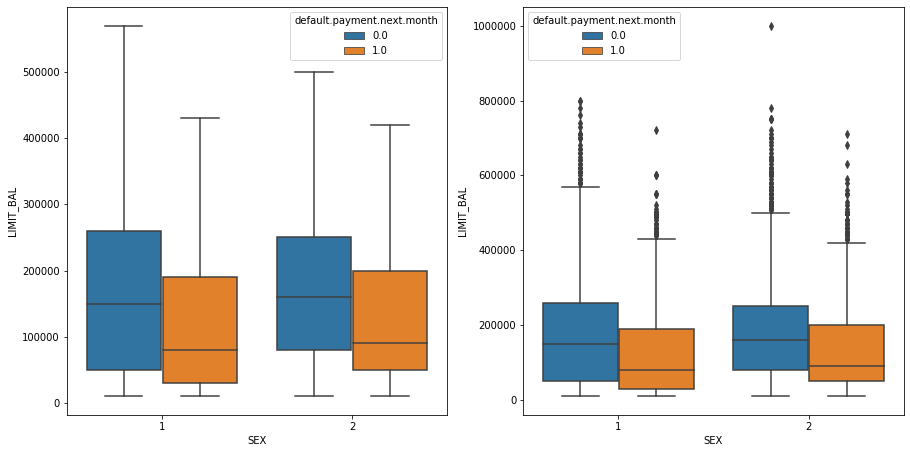

In [21]:
fig, (AX1, AX2)  = plt.subplots(ncols=2, figsize=(15,7.5))
s = sns.boxplot(ax = AX1, x="SEX", y="LIMIT_BAL", hue="default.payment.next.month",data=train,showfliers=False)
s = sns.boxplot(ax = AX2, x="SEX", y="LIMIT_BAL", hue="default.payment.next.month",data=train,showfliers=True)
plt.show()

#### Credit limit vs. Education and Sex 

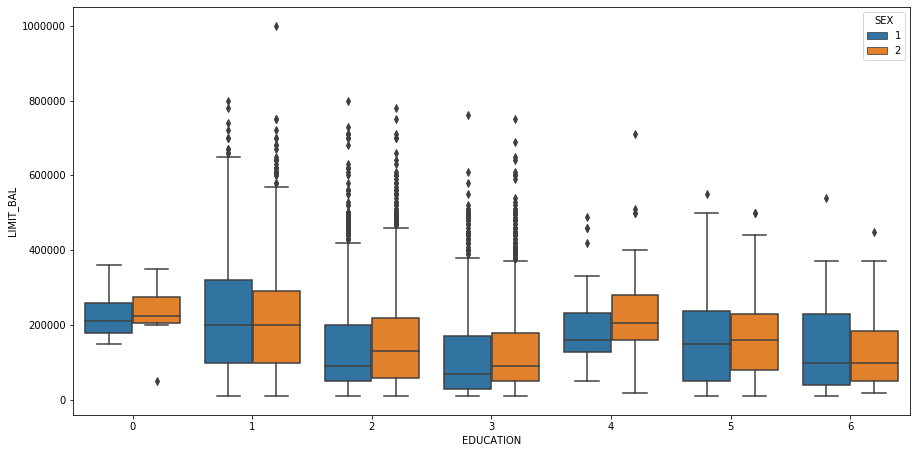

In [22]:
fig, AX2  = plt.subplots(ncols=1, figsize=(15,7.5))
#s = sns.boxplot(ax = AX1, x="EDUCATION", y="LIMIT_BAL", hue="SEX",data=train,showfliers=False)
s = sns.boxplot(ax = AX2, x="EDUCATION", y="LIMIT_BAL", hue="SEX", data=train,showfliers=True)
plt.show()

# Data Cleaning

Come notato durante l'analisi preliminare alcune categorie sono etichettate in modo errato e/o non documentate. Cercherò pertanto di sistemarle prima di svolgere l'analisi.

Per le variabili Education e Marriage i valori non documentati sono stati imputati alla categoria 'Other'

In [23]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [24]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [25]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267
std,0.489129,0.744494,0.521405
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,4.000000,3.000000


Per quanto riguarda le variabili "PAY_X" si nota la presenza dei valori non documentati '-2' e '0' che sono stati imputati alla categoria "pay duly". A questa è stato imputato valore '0' anzichè '-1'

In [26]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

In [27]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


# Modelling using Keras

In [28]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [30]:
mpl.rcParams['figure.figsize'] = (18, 12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Metrics

Definizione delle metriche utili alla valutazione del modello

In [31]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

### Model Definition

Definizione della rete neurale con __due hidden layer__ da 50 neuroni (il primo) e 25 (il secondo). Sono state inoltre aggiunti due Layer di Dropout con rate = 0.5 per evitare l'Overfitting.


Per inizializzare i pesi si è scelta la funzione __TruncatedNormal__ che genera una distribuzione Normale troncata e forzano la stessa varianza forward/backward tra i layers. É uguale alla _RandomNormal_ ad eccezione del fatto che i valori che differiscono della media per due volte la deviazione standard sono eliminati e ridefiniti.
La scelta del set iniziale di pesi è importante perché può determinare la convergenza dell'algoritmo.

Dalla prospettiva dell’ottimizzazione i pesi devono essere abbastanza grandi da poter propagare l’informazione efficientemente. 
Dalla prospettiva della regolarizzazione devono essere abbastanza piccoli da rendere il modello più robusto per la generalizzazione

In generale si ricerca un set di pesi che riesca a __"rompere la simmetria"__ tra le unità.

Inoltre i pesi iniziali assegnati alla prima rete neurale sono salvati in "initial_weights" e sono stati riassegnati a tutti i modelli successivi per migliorare il confronto fra diversi modelli. 

I neuroni degli hidden layer sono caratterizzati dalla funzione di attivazione Rectified Linear Unit (ReLU), che è efficiente nella back propagation degli errori e ha la caratteristica di attivare pochi neuroni in momenti diversi rendendo la __rete sparsa__ e di facile computazione.

Il layer di output contiene un solo neurone, caratterizzato dalla funzione di attivazione __sigmoid__,che assicura un gradiente forte oltre ad essere molto comune nei problemi di classificazione. 

Come ottimizzatore è stato usato un algoritmo con learning rate adattivo, __Adam__ (Adaptive Moments), che è una variazione di RMSProp + Momentum:
Il momentum è incorporato direttamente nella stima dei momenti di primo ordine.
Nell’RMSProp il momentum è incluso dopo avere riscalato i gradienti. 
Adam aggiunge anche una correzione del bias nei momenti.

La funzione di perdita da ottimizzare è rappresentata dalla __Binary CrossEntropy__. Altre funzioni di perdita come il MAE o il MAE, quando combinate con le unità di output saturano e producono gradienti bassi.  


In [32]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')

In [48]:
 def make_model(metrics = METRICS):
  model = keras.Sequential([
      keras.layers.Dense(16, activation='relu',kernel_initializer='TruncatedNormal', input_shape=(23,)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.binary_crossentropy,
      metrics=metrics)

  return model

### Useful functions

La funzione seguente, __plot_metrics__ , produce 4 plot utili a valutare l'andamento di _loss, AUC, Precision e Recall_ durante le diverse epoche nel Train e nel Validation set.

In [35]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.2,1])
    else:
      plt.ylim([0,1])

    plt.legend()

Per visualizzare la matrice di confusione e le relative misure di performance si definisce la funzione __plot_cm__ 

In [36]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Infine si definisce la funzione __plot_roc__ per visualizzare la ROC Curve.

In [37]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100])
  plt.ylim([0,100])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

### Data Split and Standardization


Divisione del dataset df in Train Set, Validation Set e Test Set

In [38]:
train = df[:27000]
test = df[27000:]

In [39]:
test = test.drop('default.payment.next.month', axis=1)

In [40]:
# Train-Va split
train_x, val_x = train_test_split(train, test_size=0.2)

In [41]:
train_y = np.array(train_x.pop('default.payment.next.month'))
val_y = np.array(val_x.pop('default.payment.next.month'))
 
train_x = np.array(train_x)
val_x = np.array(val_x)
test_x= np.array(test)

Standardizzazione dei dati

In [42]:
scaler= StandardScaler()
train_x = scaler.fit_transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.fit_transform(test_x)
print('Training labels', train_y.shape)
print('Validation labels', val_y.shape)

print('Training features', train_x.shape)
print('Validation features', val_x.shape)
print('Test features', test_x.shape)

Training labels (21600,)
Validation labels (5400,)
Training features (21600, 23)
Validation features (5400, 23)
Test features (3000, 23)


Ad ogni iterazione viene campionata randomicamente una __minibatch da 2048 esempi__, abbastanza ampia da contenere al proprio interno sufficienti campioni della classe rara.

Per trainare l'algoritmo si utilizzano 100 epoche, a meno dell'intervento dell'__Early Stopping__, che ferma il training quando non si ha un miglioramento sostanziale dell'AUC (Area Under the Curve) per più di 10 epoche. 

In [51]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=8,
    mode='max',
    restore_best_weights=True)

## BASELINE MODEL

In [52]:
model = make_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                384       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.save_weights(initial_weights)

In [54]:
model = make_model()
model.load_weights(initial_weights)

In [55]:
baseline_history = model.fit(
    train_x,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_x, val_y))

Train on 21600 samples, validate on 5400 samples
Epoch 1/100
21600/21600 [==============================] - 1s 67us/sample - loss: 0.7032 - tp: 2923.0000 - fp: 9606.0000 - tn: 7230.0000 - fn: 1841.0000 - accuracy: 0.4700 - precision: 0.2333 - recall: 0.6136 - auc: 0.5327 - val_loss: 0.6691 - val_tp: 159.0000 - val_fp: 184.0000 - val_tn: 4007.0000 - val_fn: 1050.0000 - val_accuracy: 0.7715 - val_precision: 0.4636 - val_recall: 0.1315 - val_auc: 0.5694
Epoch 2/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.6598 - tp: 991.0000 - fp: 1882.0000 - tn: 14954.0000 - fn: 3773.0000 - accuracy: 0.7382 - precision: 0.3449 - recall: 0.2080 - auc: 0.5495 - val_loss: 0.6322 - val_tp: 16.0000 - val_fp: 10.0000 - val_tn: 4181.0000 - val_fn: 1193.0000 - val_accuracy: 0.7772 - val_precision: 0.6154 - val_recall: 0.0132 - val_auc: 0.6084
Epoch 3/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.6223 - tp: 498.0000 - fp: 436.0000 - tn: 16400.0000 - fn:

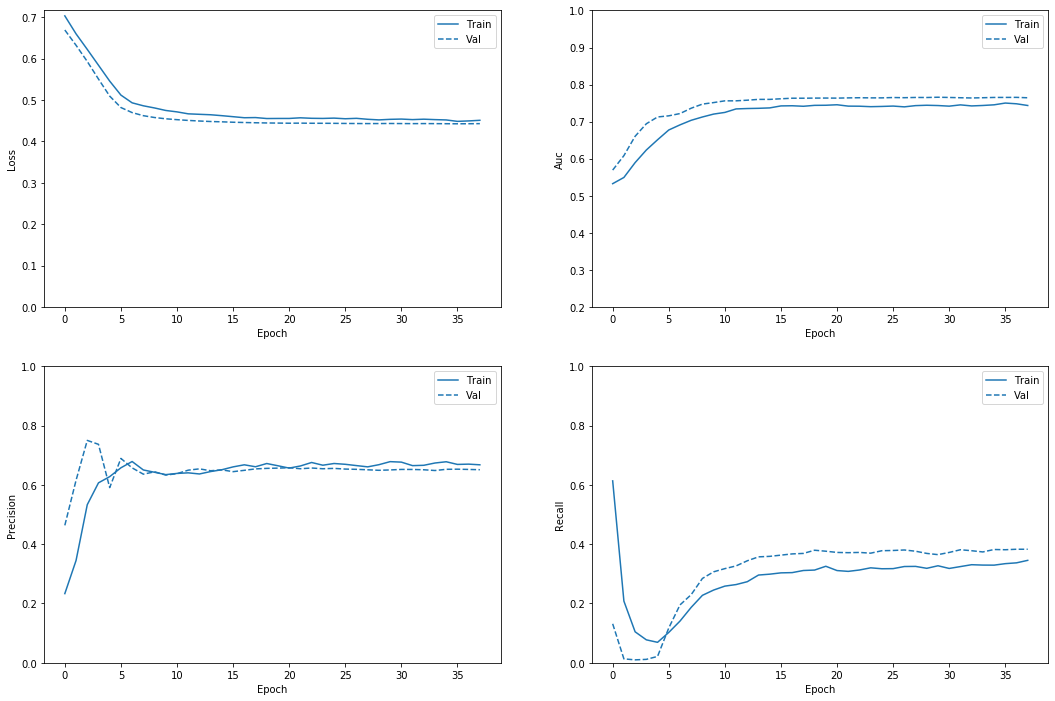

In [56]:
plot_metrics(baseline_history)

In [57]:
train_predictions_baseline = model.predict(train_x, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_x, batch_size=BATCH_SIZE)

loss :  0.4432679785622491
tp :  441.0
fp :  237.0
tn :  3954.0
fn :  768.0
accuracy :  0.8138889
precision :  0.6504425
recall :  0.36476427
auc :  0.76592755

Legitimate Transactions Detected (True Negatives):  3954
Legitimate Transactions Incorrectly Detected (False Positives):  237
Fraudulent Transactions Missed (False Negatives):  768
Fraudulent Transactions Detected (True Positives):  441
Total Fraudulent Transactions:  1209


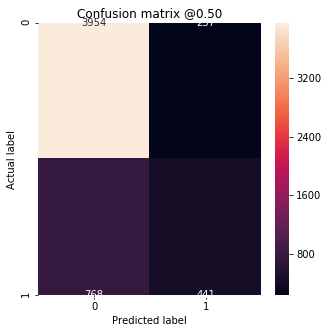

In [58]:
baseline_results = model.evaluate(val_x, val_y, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(val_y, val_predictions_baseline)

### Model Evaluation

Malgrado l'accuracy sia molto alta, non può essere utilizzata per valutare il classificatore a causa delle classi sbilanciate.

Ponendo l'attenzione sull'F-Measure si nota come il classificatore non è efficiente e quindi vanno effettuate delle correzioni per le classi sbilanciate.

Può essere utile concentrarsi sulla diminuizione dei Falsi Negativi, in quanto il loro costo potrebbe essere più elevato rispetto a quello dei Falsi Positivi (nel primo caso "perderemmo" delle transazioni fraudolente, nel secondo probabilmente manderemmo una mail al cliente chiedendo di attenzionare la propria situazione finanziaria)

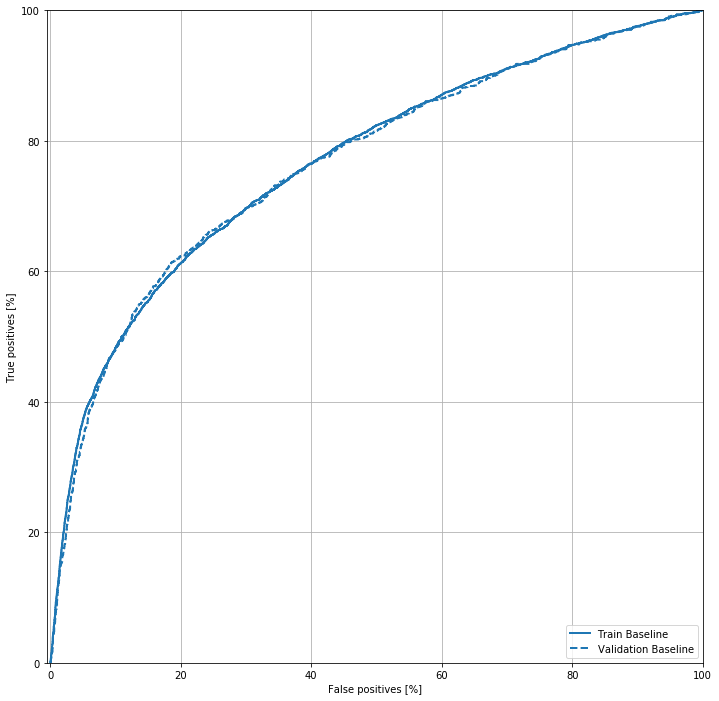

In [59]:
plot_roc("Train Baseline", train_y, train_predictions_baseline, color=colors[0])
plot_roc("Validation Baseline", val_y, val_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

## WEIGHTED MODEL

Managing unbalanced classes

Un rimedio utile nel caso di classificazione a classi sbilanciate è rappresentato dall'imposizione di un sistema di pesi che dia più valore alla classe rara nella fase di Training (esistono anche altri metodi come Oversampling ecc..)

In [60]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.64
Weight for class 1: 2.26


In [61]:
import random

In [62]:
random.seed(22)
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

In [63]:
weighted_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                384       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [64]:
weighted_history = weighted_model.fit(
    train_x,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_x, val_y),
    class_weight=class_weight) 

Train on 21600 samples, validate on 5400 samples
Epoch 1/100
21600/21600 [==============================] - 2s 77us/sample - loss: 0.6868 - tp: 3843.0000 - fp: 12872.0000 - tn: 3964.0000 - fn: 921.0000 - accuracy: 0.3614 - precision: 0.2299 - recall: 0.8067 - auc: 0.5714 - val_loss: 0.6962 - val_tp: 974.0000 - val_fp: 2478.0000 - val_tn: 1713.0000 - val_fn: 235.0000 - val_accuracy: 0.4976 - val_precision: 0.2822 - val_recall: 0.8056 - val_auc: 0.6940
Epoch 2/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.6690 - tp: 3500.0000 - fp: 9622.0000 - tn: 7214.0000 - fn: 1264.0000 - accuracy: 0.4960 - precision: 0.2667 - recall: 0.7347 - auc: 0.6482 - val_loss: 0.6853 - val_tp: 857.0000 - val_fp: 1645.0000 - val_tn: 2546.0000 - val_fn: 352.0000 - val_accuracy: 0.6302 - val_precision: 0.3425 - val_recall: 0.7089 - val_auc: 0.7290
Epoch 3/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.6483 - tp: 3270.0000 - fp: 6919.0000 - tn: 9917.0000 - 

21600/21600 [==============================] - 0s 11us/sample - loss: 0.5818 - tp: 2912.0000 - fp: 3398.0000 - tn: 13438.0000 - fn: 1852.0000 - accuracy: 0.7569 - precision: 0.4615 - recall: 0.6113 - auc: 0.7612 - val_loss: 0.5519 - val_tp: 748.0000 - val_fp: 821.0000 - val_tn: 3370.0000 - val_fn: 461.0000 - val_accuracy: 0.7626 - val_precision: 0.4767 - val_recall: 0.6187 - val_auc: 0.7739
Epoch 22/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.5806 - tp: 2897.0000 - fp: 3372.0000 - tn: 13464.0000 - fn: 1867.0000 - accuracy: 0.7575 - precision: 0.4621 - recall: 0.6081 - auc: 0.7608 - val_loss: 0.5557 - val_tp: 751.0000 - val_fp: 837.0000 - val_tn: 3354.0000 - val_fn: 458.0000 - val_accuracy: 0.7602 - val_precision: 0.4729 - val_recall: 0.6212 - val_auc: 0.7737
Epoch 23/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.5834 - tp: 2926.0000 - fp: 3476.0000 - tn: 13360.0000 - fn: 1838.0000 - accuracy: 0.7540 - precision: 0.4570 - rec

21600/21600 [==============================] - 0s 11us/sample - loss: 0.5743 - tp: 3027.0000 - fp: 3782.0000 - tn: 13054.0000 - fn: 1737.0000 - accuracy: 0.7445 - precision: 0.4446 - recall: 0.6354 - auc: 0.7678 - val_loss: 0.5384 - val_tp: 759.0000 - val_fp: 863.0000 - val_tn: 3328.0000 - val_fn: 450.0000 - val_accuracy: 0.7569 - val_precision: 0.4679 - val_recall: 0.6278 - val_auc: 0.7791
Epoch 62/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.5746 - tp: 2988.0000 - fp: 3635.0000 - tn: 13201.0000 - fn: 1776.0000 - accuracy: 0.7495 - precision: 0.4512 - recall: 0.6272 - auc: 0.7669 - val_loss: 0.5376 - val_tp: 757.0000 - val_fp: 851.0000 - val_tn: 3340.0000 - val_fn: 452.0000 - val_accuracy: 0.7587 - val_precision: 0.4708 - val_recall: 0.6261 - val_auc: 0.7790
Epoch 63/100
21600/21600 [==============================] - 0s 11us/sample - loss: 0.5768 - tp: 3053.0000 - fp: 3813.0000 - tn: 13023.0000 - fn: 1711.0000 - accuracy: 0.7443 - precision: 0.4447 - rec

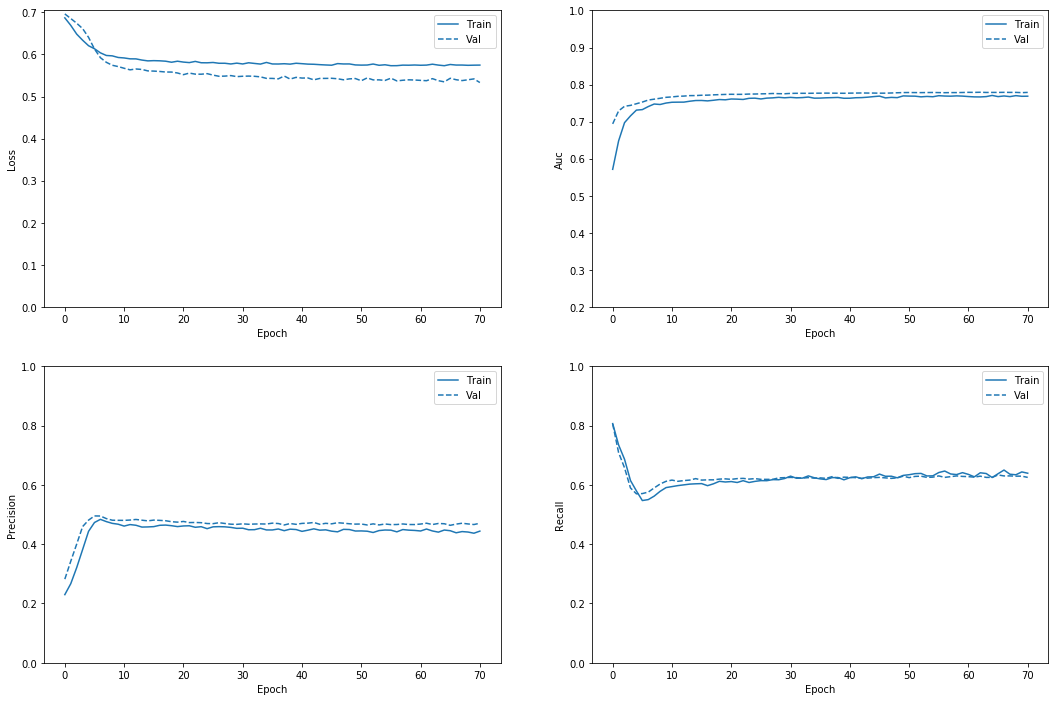

In [65]:
plot_metrics(weighted_history)

In [66]:
train_predictions_weighted = weighted_model.predict(train_x, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_x, batch_size=BATCH_SIZE)

loss :  0.5424483871459961
tp :  761.0
fp :  871.0
tn :  3320.0
fn :  448.0
accuracy :  0.75574076
precision :  0.46629903
recall :  0.62944585
auc :  0.77936083

Legitimate Transactions Detected (True Negatives):  3320
Legitimate Transactions Incorrectly Detected (False Positives):  871
Fraudulent Transactions Missed (False Negatives):  448
Fraudulent Transactions Detected (True Positives):  761
Total Fraudulent Transactions:  1209


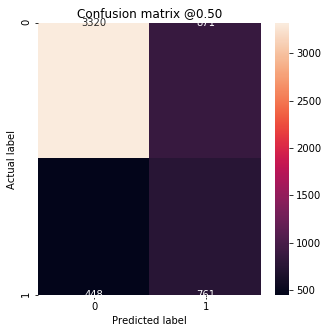

In [67]:
weighted_results = weighted_model.evaluate(val_x, val_y, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_y, val_predictions_weighted)

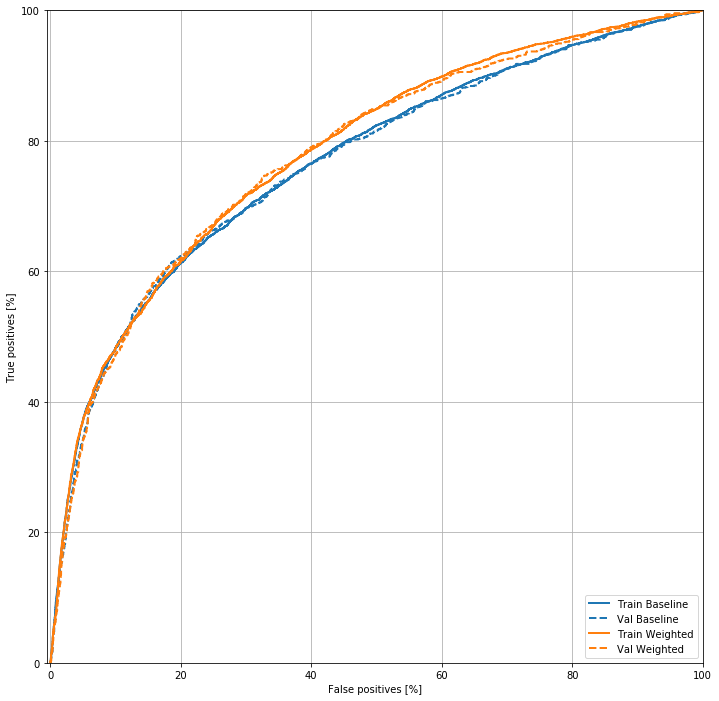

In [68]:
plot_roc("Train Baseline", train_y, train_predictions_baseline, color=colors[0])
plot_roc("Val Baseline", val_y, val_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_y, train_predictions_weighted, color=colors[1])
plot_roc("Val Weighted", val_y, val_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In termini di AUC non si nota un particolare miglioramento.

Tuttavia i valori di precision e racall sono più bilanciati, confermando che questo sistema di pesi aiuta il classificatore a riconoscere i clienti che andranno in default.

Finita la fase di training, si applica l'algoritmo al test set per effettuare la previsione. 

## Test Set prediction

In [69]:
test_predictions = weighted_model.predict(test_x, batch_size=BATCH_SIZE)

In [70]:
test_predictions.mean()

0.42429647

SyntaxError: invalid syntax (<ipython-input-1-6970e1f3625a>, line 1)